In [1]:
import pandas as pd
import numpy as np
import re
from wordcloud import WordCloud

# 글꼴 설정

In [2]:
import matplotlib.font_manager as fm
import matplotlib.pyplot as plt

In [3]:
print(plt.rcParams['font.family'])

['sans-serif']


In [4]:
plt.rcParams['font.family']='NanumGothic'

# 2000년~2004년

- ISBN 부가기호: 첫째 자리는 독자대상 기호입니다.<br>
0 : 교양<br>
1 : 실용<br>
2 : 여성<br>
3 : 예비번호<br>
4 : 청소년<br>
5 : 중·고교용 학습참고서<br>
6 : 초등용 학습참고서<br>
7 : 아동<br>
8 : 예비번호<br>
9 : 전문·학술<br>
**4,5,6,7**

In [5]:
# 데이터 불러오기
df=pd.read_csv('booklist_child_00_04.csv',encoding='cp949')
df.head()

,순위,서명,저자,출판사,출판년도,권,ISBN,ISBN부가기호,KDC,대출건수,year
0,1,뚱딴지 명언 산책,김우영 글.그림,재능출판,1997,NaN,9.788980e+12,77810.0,199.10,"2,243",2000
1,2,"말할 수 있는 중국어, 들을 수 있는 중국어:생활회화",류기수 지음,백산서당,1997,NaN,9.788970e+12,3720.0,727.50,"1,697",2000
2,3,윤효석 작품집,尹孝錫 著,梨花文化出版社,1997,NaN,9.788980e+12,3570.0,648.00,972,2000
3,4,여자는 모른다,이시형 지음,살림출판사,1999,NaN,9.788950e+12,3810.0,181.71,872,2000
4,5,모순:양귀자 장편소설,양귀자 지음,살림출판사,1998,NaN,9.788990e+12,3810.0,813.60,609,2000


In [6]:
total_sum00_04=df['대출건수'].str.replace(',','').astype('int').sum()

In [7]:
pd.isnull(df['ISBN부가기호']).sum()

32

In [8]:
# 결측치 제거
df=df.dropna(axis=0,subset=['ISBN부가기호']).reset_index()
df.head()

,index,순위,서명,저자,출판사,출판년도,권,ISBN,ISBN부가기호,KDC,대출건수,year
0,0,1,뚱딴지 명언 산책,김우영 글.그림,재능출판,1997,NaN,9.788980e+12,77810.0,199.10,"2,243",2000
1,1,2,"말할 수 있는 중국어, 들을 수 있는 중국어:생활회화",류기수 지음,백산서당,1997,NaN,9.788970e+12,3720.0,727.50,"1,697",2000
2,2,3,윤효석 작품집,尹孝錫 著,梨花文化出版社,1997,NaN,9.788980e+12,3570.0,648.00,972,2000
3,3,4,여자는 모른다,이시형 지음,살림출판사,1999,NaN,9.788950e+12,3810.0,181.71,872,2000
4,4,5,모순:양귀자 장편소설,양귀자 지음,살림출판사,1998,NaN,9.788990e+12,3810.0,813.60,609,2000


In [9]:
df['ISBN부가기호']=df['ISBN부가기호'].astype('int')
df['ISBN부가기호']=df['ISBN부가기호'].astype('str')

In [10]:
df.head()

,index,순위,서명,저자,출판사,출판년도,권,ISBN,ISBN부가기호,KDC,대출건수,year
0,0,1,뚱딴지 명언 산책,김우영 글.그림,재능출판,1997,NaN,9.788980e+12,77810,199.10,"2,243",2000
1,1,2,"말할 수 있는 중국어, 들을 수 있는 중국어:생활회화",류기수 지음,백산서당,1997,NaN,9.788970e+12,3720,727.50,"1,697",2000
2,2,3,윤효석 작품집,尹孝錫 著,梨花文化出版社,1997,NaN,9.788980e+12,3570,648.00,972,2000
3,3,4,여자는 모른다,이시형 지음,살림출판사,1999,NaN,9.788950e+12,3810,181.71,872,2000
4,4,5,모순:양귀자 장편소설,양귀자 지음,살림출판사,1998,NaN,9.788990e+12,3810,813.60,609,2000


In [11]:
# ISBN부가기호에 따라 4,5,6,7번인 아동대상 도서 추출

number=list(df['ISBN부가기호'])
filter_number=[]
for i,v in enumerate(number):
    if len(v)==5:
        if int(v[0]) in [4,5,6,7]:
            filter_number.append(i)

In [12]:
print('애들 책 수: ',end='\t')
print(len(filter_number))
child_book00_04=len(filter_number)

애들 책 수: 	619


In [13]:
df=df.loc[filter_number,:].reset_index()

In [14]:
df['대출건수']=df['대출건수'].str.replace(',','').astype('int')
print('아이 책 대출건수는 {} 이다.'.format(df['대출건수'].sum()))
child_sum00_04=df['대출건수'].sum()

아이 책 대출건수는 387498 이다.


In [15]:
# 도서명 내 특수기호 제거
df['서명']=df['서명'].str.replace(r'[-=.#/?!:$]','')

In [16]:
# 도서명 -> 띄어쓰기 기준으로 단어단위로 분리
name=list(df['서명'].str.replace('(','').str.replace(')',''))
fre=list(df['대출건수'].astype('int'))
kwd=list(map(lambda x:x.split(),name))
kwd[:5]

[['뚱딴지', '명언', '산책'],
 ['만화로', '보는신라', '왕조', '1000년'],
 ['웃음천국텔레토비와', '사오정'],
 ['만화로', '보는고려', '왕조', '500년'],
 ['만화로', '보는고구려', '왕조', '700년']]

In [17]:
# 단어 빈도 세기
mdict={}

for idx,name in enumerate(kwd):
    for word in name:
        if word in mdict:
            mdict[word]+=fre[idx]
        else:
            mdict[word]=fre[idx]
list(mdict.items())[:5]

[('뚱딴지', 23053), ('명언', 17819), ('산책', 17819), ('만화로', 53444), ('보는신라', 1168)]

In [18]:
# 빈도 많은 순으로 정렬해보기
sorted(mdict.items(),key=lambda x:x[1],reverse=True)[:5]

[('만화로', 53444),
 ('신화', 40390),
 ('로마', 30179),
 ('보는그리스', 28616),
 ('뚱딴지', 23053)]

In [19]:
font_path='C:/Windows/Fonts/NanumGothic.ttf'

In [20]:
wordcloud=WordCloud(font_path=font_path,width=1000, height=1000)
wordcloud=wordcloud.generate_from_frequencies(mdict)
wordcloud.to_file('kwd.png')

array=wordcloud.to_array()
print(type(array))
print(array.shape)

<class 'numpy.ndarray'>
(1000, 1000, 3)


['NanumGothic']


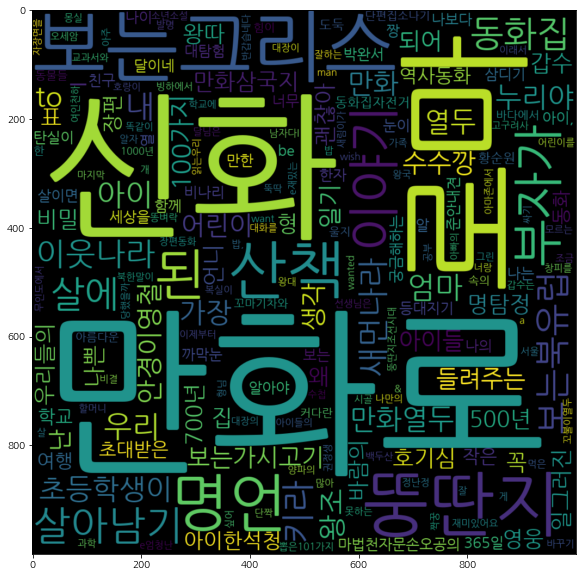

In [21]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.rc('font', family='NanumGothic')
print(plt.rcParams['font.family'])

fig=plt.figure(figsize=(10,10))
plt.imshow(array,interpolation='bilinear')
plt.show()

# 2005~2009

In [22]:
df=pd.read_csv('booklist_child_05_09.csv',encoding='cp949')
df.head()

,순위,서명,저자,출판사,출판년도,권,ISBN,ISBN부가기호,KDC,대출건수,year
0,1,뚱딴지 명언 산책,김우영 글.그림,재능출판,1997,NaN,9.788980e+12,77810.0,199.1,"5,396",2005
1,2,마법천자문:손오공의 한자 대탐험,시리얼 글·그림,북21아울북,2004,4.0,9.788950e+12,77720.0,711.4,"2,885",2005
2,3,마법천자문:손오공의 한자 대탐험,시리얼 글·그림,북21아울북,2004,5.0,9.788950e+12,77720.0,711.4,"2,805",2005
3,4,마법천자문:손오공의 한자 대탐험,시리얼 글·그림,북21아울북,2004,2.0,9.788950e+12,77720.0,711.4,"2,793",2005
4,5,마법천자문:손오공의 한자 대탐험,시리얼 글·그림,북21아울북,2004,6.0,9.788950e+12,77720.0,711.4,"2,770",2005


In [23]:
total_sum05_09=df['대출건수'].str.replace(',','').astype('int').sum()
total_sum05_09

2138288

In [24]:
pd.isnull(df['ISBN부가기호']).sum()

2

In [25]:
df=df.dropna(axis=0,subset=['ISBN부가기호']).reset_index()
df.head()

,index,순위,서명,저자,출판사,출판년도,권,ISBN,ISBN부가기호,KDC,대출건수,year
0,0,1,뚱딴지 명언 산책,김우영 글.그림,재능출판,1997,NaN,9.788980e+12,77810.0,199.1,"5,396",2005
1,1,2,마법천자문:손오공의 한자 대탐험,시리얼 글·그림,북21아울북,2004,4.0,9.788950e+12,77720.0,711.4,"2,885",2005
2,2,3,마법천자문:손오공의 한자 대탐험,시리얼 글·그림,북21아울북,2004,5.0,9.788950e+12,77720.0,711.4,"2,805",2005
3,3,4,마법천자문:손오공의 한자 대탐험,시리얼 글·그림,북21아울북,2004,2.0,9.788950e+12,77720.0,711.4,"2,793",2005
4,4,5,마법천자문:손오공의 한자 대탐험,시리얼 글·그림,북21아울북,2004,6.0,9.788950e+12,77720.0,711.4,"2,770",2005


In [26]:
df['ISBN부가기호']=df['ISBN부가기호'].astype('int')
df['ISBN부가기호']=df['ISBN부가기호'].astype('str')

In [27]:
number=list(df['ISBN부가기호'])
filter_number=[]
for i,v in enumerate(number):
    if len(v)==5:
        if int(v[0]) in [4,5,6,7]:
            filter_number.append(i)

In [28]:
print('애들 책 수: ',end='\t')
print(len(filter_number))
child_book05_09=len(filter_number)

애들 책 수: 	821


In [29]:
df=df.loc[filter_number,:].reset_index()

In [30]:
df['대출건수']=df['대출건수'].str.replace(',','').astype('int')
print('아이 책 대출건수는 {} 이다.'.format(df['대출건수'].sum()))
child_sum05_09=df['대출건수'].sum()

아이 책 대출건수는 1730152 이다.


In [31]:
df['서명']=df['서명'].str.replace(r'[-=.#/?!:$]','')

In [32]:
name=list(df['서명'].str.replace('(','').str.replace(')',''))
fre=list(df['대출건수'].astype('int'))
kwd=list(map(lambda x:x.split(),name))
kwd[:5]

[['뚱딴지', '명언', '산책'],
 ['마법천자문손오공의', '한자', '대탐험'],
 ['마법천자문손오공의', '한자', '대탐험'],
 ['마법천자문손오공의', '한자', '대탐험'],
 ['마법천자문손오공의', '한자', '대탐험']]

In [33]:
mdict={}

for idx,name in enumerate(kwd):
    for word in name:
        if word in mdict:
            mdict[word]+=fre[idx]
        else:
            mdict[word]=fre[idx]
list(mdict.items())[:5]

[('뚱딴지', 18481),
 ('명언', 18481),
 ('산책', 18481),
 ('마법천자문손오공의', 99261),
 ('한자', 191558)]

In [34]:
sorted(mdict.items(),key=lambda x:x[1],reverse=True)[:5]

[('한자', 191558),
 ('대탐험', 191558),
 ('Why', 159715),
 ('살아남기', 158323),
 ('마법의', 144181)]

In [35]:
font_path='C:/Windows/Fonts/NanumGothic.ttf'

In [36]:
wordcloud=WordCloud(font_path=font_path,width=1000, height=1000)
wordcloud=wordcloud.generate_from_frequencies(mdict)
wordcloud.to_file('kwd.png')

array=wordcloud.to_array()
print(type(array))
print(array.shape)

<class 'numpy.ndarray'>
(1000, 1000, 3)


['NanumGothic']


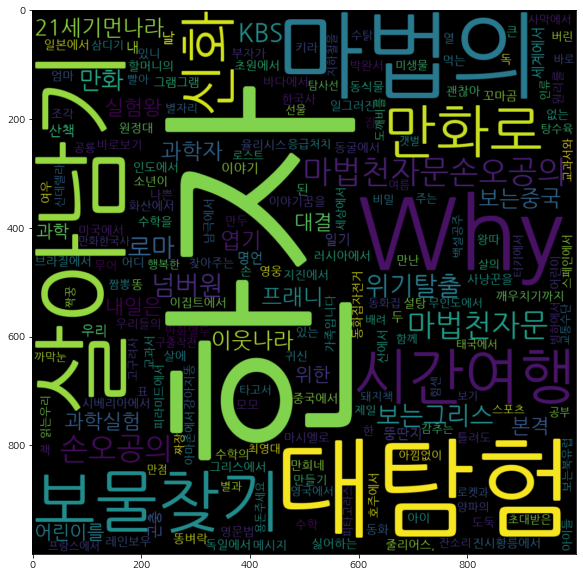

In [37]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.rc('font', family='NanumGothic')
print(plt.rcParams['font.family'])

fig=plt.figure(figsize=(10,10))
plt.imshow(array,interpolation='bilinear')
plt.show()

# 2010~ 2014

In [38]:
df=pd.read_csv('booklist_child_10_14.csv',encoding='cp949')
df.head()

,순위,서명,저자,출판사,출판년도,권,ISBN,ISBN부가기호,KDC,대출건수,year
0,1,엄마를 부탁해 :신경숙 장편소설,지은이: 신경숙,창비,2008,NaN,9.788940e+12,3810.0,813.7,"5,772",2010
1,2,Why? 나라의 시작,글: 이근 ;그림: 극동만화연구소,예림당,2009,1.0,9.788930e+12,73910.0,911.0,"5,078",2010
2,3,내일은 실험왕 :본격 대결 과학실험 만화,글: 곰돌이 co. ;그림: 홍종현,대한교과서,2006-2008,9.0,9.788940e+12,77400.0,400.0,"4,996",2010
3,4,(KBS 위기탈출) 넘버원,구성: 에듀코믹 ;원 프로덕션,밝은미래,2006-2015,2.0,9.789000e+12,77810.0,539.0,"4,764",2010
4,5,Why? 고려 시대,글: 이근 ;그림: 극동만화연구소,예림당,2009,3.0,9.788930e+12,73910.0,911.0,"4,712",2010


In [39]:
total_sum10_14=df['대출건수'].str.replace(',','').astype('int').sum()

In [40]:
pd.isnull(df['ISBN부가기호']).sum()

3

In [41]:
df=df.dropna(axis=0,subset=['ISBN부가기호']).reset_index()
df.head()

,index,순위,서명,저자,출판사,출판년도,권,ISBN,ISBN부가기호,KDC,대출건수,year
0,0,1,엄마를 부탁해 :신경숙 장편소설,지은이: 신경숙,창비,2008,NaN,9.788940e+12,3810.0,813.7,"5,772",2010
1,1,2,Why? 나라의 시작,글: 이근 ;그림: 극동만화연구소,예림당,2009,1.0,9.788930e+12,73910.0,911.0,"5,078",2010
2,2,3,내일은 실험왕 :본격 대결 과학실험 만화,글: 곰돌이 co. ;그림: 홍종현,대한교과서,2006-2008,9.0,9.788940e+12,77400.0,400.0,"4,996",2010
3,3,4,(KBS 위기탈출) 넘버원,구성: 에듀코믹 ;원 프로덕션,밝은미래,2006-2015,2.0,9.789000e+12,77810.0,539.0,"4,764",2010
4,4,5,Why? 고려 시대,글: 이근 ;그림: 극동만화연구소,예림당,2009,3.0,9.788930e+12,73910.0,911.0,"4,712",2010


In [42]:
df['ISBN부가기호']=df['ISBN부가기호'].astype('int')
df['ISBN부가기호']=df['ISBN부가기호'].astype('str')

In [43]:
number=list(df['ISBN부가기호'])
filter_number=[]
for i,v in enumerate(number):
    if len(v)==5:
        if int(v[0]) in [4,5,6,7]:
            filter_number.append(i)

In [44]:
print('애들 책 수: ',end='\t')
print(len(filter_number))
child_book10_14=len(filter_number)

애들 책 수: 	912


In [45]:
df=df.loc[filter_number,:].reset_index()

In [46]:
df['대출건수']=df['대출건수'].str.replace(',','').astype('int')
print('아이 책 대출건수는 {} 이다.'.format(df['대출건수'].sum()))
child_sum10_14=df['대출건수'].sum()

아이 책 대출건수는 3517344 이다.


In [47]:
df['서명']=df['서명'].str.replace(r'[-=.#/?!:$]','')

In [48]:
name=list(df['서명'].str.replace('(','').str.replace(')',''))
fre=list(df['대출건수'].astype('int'))
kwd=list(map(lambda x:x.split(),name))
kwd[:5]

[['Why', '나라의', '시작'],
 ['내일은', '실험왕', '본격', '대결', '과학실험', '만화'],
 ['KBS', '위기탈출', '넘버원'],
 ['Why', '고려', '시대'],
 ['베트남에서', '보물찾기']]

In [49]:
mdict={}

for idx,name in enumerate(kwd):
    for word in name:
        if word in mdict:
            mdict[word]+=fre[idx]
        else:
            mdict[word]=fre[idx]
list(mdict.items())[:5]

[('Why', 318970),
 ('나라의', 12902),
 ('시작', 12902),
 ('내일은', 479888),
 ('실험왕', 437434)]

In [50]:
sorted(mdict.items(),key=lambda x:x[1],reverse=True)[:5]

[('만화', 491169),
 ('내일은', 479888),
 ('본격', 479888),
 ('대결', 479888),
 ('코믹', 464854)]

In [51]:
wordcloud=WordCloud(font_path=font_path,width=1000, height=1000)
wordcloud=wordcloud.generate_from_frequencies(mdict)
wordcloud.to_file('kwd.png')

array=wordcloud.to_array()
print(type(array))
print(array.shape)

<class 'numpy.ndarray'>
(1000, 1000, 3)


['NanumGothic']


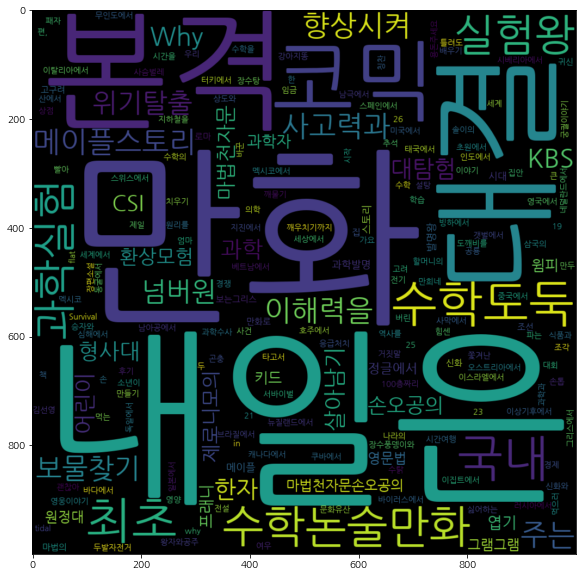

In [52]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.rc('font', family='NanumGothic')
print(plt.rcParams['font.family'])

fig=plt.figure(figsize=(10,10))
plt.imshow(array,interpolation='bilinear')
plt.show()

# 2015~ 2019

In [53]:
df=pd.read_csv('booklist_child_15_19.csv',encoding='cp949')
df.head()

,순위,서명,저자,출판사,출판년도,권,ISBN,ISBN부가기호,KDC,대출건수,year
0,1,엄마를 부탁해 :신경숙 장편소설,지은이: 신경숙,창비,2008,NaN,9788936433673,3810.0,813.7,"5,695",2015
1,2,내일은 실험왕 :본격 대결 과학실험 만화,"글: 곰돌이 co. ,그림: 홍종현",미래엔,2011-2020,25.0,9788937884085,77400.0,400.0,"5,586",2015
2,3,내일은 실험왕 :본격 대결 과학실험 만화,"글: 곰돌이 co. ,그림: 홍종현",미래엔,2011-2020,24.0,9788937884078,77400.0,400.0,"5,321",2015
3,4,내일은 실험왕 :본격 대결 과학실험 만화,"글: 곰돌이 co. ,그림: 홍종현",미래엔,2011-2020,21.0,9788937884047,77400.0,400.0,"5,261",2015
4,5,내일은 실험왕 :본격 대결 과학실험 만화,"글: 곰돌이 co. ,그림: 홍종현",미래엔,2011-2020,22.0,9788937884054,77400.0,400.0,"5,251",2015


In [54]:
total_sum15_19=df['대출건수'].str.replace(',','').astype('int').sum()

In [55]:
pd.isnull(df['ISBN부가기호']).sum()

65

In [56]:
df=df.dropna(axis=0,subset=['ISBN부가기호']).reset_index()
df

,index,순위,서명,저자,출판사,출판년도,권,ISBN,ISBN부가기호,KDC,대출건수,year
0,0,1,엄마를 부탁해 :신경숙 장편소설,지은이: 신경숙,창비,2008,NaN,9788936433673,3810.0,813.7,"5,695",2015
1,1,2,내일은 실험왕 :본격 대결 과학실험 만화,"글: 곰돌이 co. ,그림: 홍종현",미래엔,2011-2020,25.0,9788937884085,77400.0,400.0,"5,586",2015
2,2,3,내일은 실험왕 :본격 대결 과학실험 만화,"글: 곰돌이 co. ,그림: 홍종현",미래엔,2011-2020,24.0,9788937884078,77400.0,400.0,"5,321",2015
3,3,4,내일은 실험왕 :본격 대결 과학실험 만화,"글: 곰돌이 co. ,그림: 홍종현",미래엔,2011-2020,21.0,9788937884047,77400.0,400.0,"5,261",2015
4,4,5,내일은 실험왕 :본격 대결 과학실험 만화,"글: 곰돌이 co. ,그림: 홍종현",미래엔,2011-2020,22.0,9788937884054,77400.0,400.0,"5,251",2015
...,...,...,...,...,...,...,...,...,...,...,...,...
930,995,196,(코믹 메이플스토리) 수학도둑 :사고력과 이해력을 향상시켜 주는 국내 최초 수학논술만화,글: 송도수 ;서정 엔터테인먼트,서울문화사,2006-2015,17.0,9788926390276,77810.0,410.0,"2,974",2019
931,996,197,(코믹 메이플스토리) 수학도둑 :사고력과 이해력을 향상시켜 주는 국내 최초 수학논술만화,글: 송도수 ;서정 엔터테인먼트,서울문화사,2006-2015,28.0,9788926393581,67410.0,410.0,"2,971",2019
932,997,198,(코믹 메이플스토리) 수학도둑 :사고력과 이해력을 향상시켜 주는 국내 최초 수학논술만화,글: 송도수 ;서정 엔터테인먼트,서울문화사,2006-2015,27.0,9788926391846,67410.0,410.0,"2,970",2019
933,998,198,내일은 실험왕 :본격 대결 과학실험 만화,"글: 곰돌이 co. ,그림: 홍종현",미래엔,2011-2020,21.0,9788937884047,77400.0,400.0,"2,970",2019


In [57]:
df['ISBN부가기호']=df['ISBN부가기호'].astype('int')
df['ISBN부가기호']=df['ISBN부가기호'].astype('str')

In [58]:
number=list(df['ISBN부가기호'])
filter_number=[]
for i,v in enumerate(number):
    if len(v)==5:
        if int(v[0]) in [4,5,6,7]:
            filter_number.append(i)

In [59]:
print('애들 책 수: ',end='\t')
print(len(filter_number))
child_book15_19=len(filter_number)

애들 책 수: 	869


In [60]:
df=df.loc[filter_number,:].reset_index()

In [61]:
df['대출건수']=df['대출건수'].str.replace(',','').astype('int')
print('아이 책 대출건수는 {} 이다.'.format(df['대출건수'].sum()))
child_sum15_19=df['대출건수'].sum()

아이 책 대출건수는 3349819 이다.


In [62]:
df['서명']=df['서명'].str.replace(r'[-=.#/?!:$]','')

In [63]:
name=list(df['서명'].str.replace('(','').str.replace(')',''))
fre=list(df['대출건수'].astype('int'))
kwd=list(map(lambda x:x.split(),name))
kwd[:5]

[['내일은', '실험왕', '본격', '대결', '과학실험', '만화'],
 ['내일은', '실험왕', '본격', '대결', '과학실험', '만화'],
 ['내일은', '실험왕', '본격', '대결', '과학실험', '만화'],
 ['내일은', '실험왕', '본격', '대결', '과학실험', '만화'],
 ['마법천자문', '손오공의', '한자', '대탐험']]

In [64]:
mdict={}

for idx,name in enumerate(kwd):
    for word in name:
        if word in mdict:
            mdict[word]+=fre[idx]
        else:
            mdict[word]=fre[idx]
list(mdict.items())[:5]

[('내일은', 972993),
 ('실험왕', 614496),
 ('본격', 972993),
 ('대결', 969993),
 ('과학실험', 614496)]

In [65]:
sorted(mdict.items(),key=lambda x:x[1],reverse=True)[:5]

[('내일은', 972993),
 ('본격', 972993),
 ('만화', 972993),
 ('대결', 969993),
 ('코믹', 689225)]

In [66]:
wordcloud=WordCloud(font_path=font_path,width=1000, height=1000)
wordcloud=wordcloud.generate_from_frequencies(mdict)
wordcloud.to_file('kwd.png')

array=wordcloud.to_array()
print(type(array))
print(array.shape)

<class 'numpy.ndarray'>
(1000, 1000, 3)


['NanumGothic']


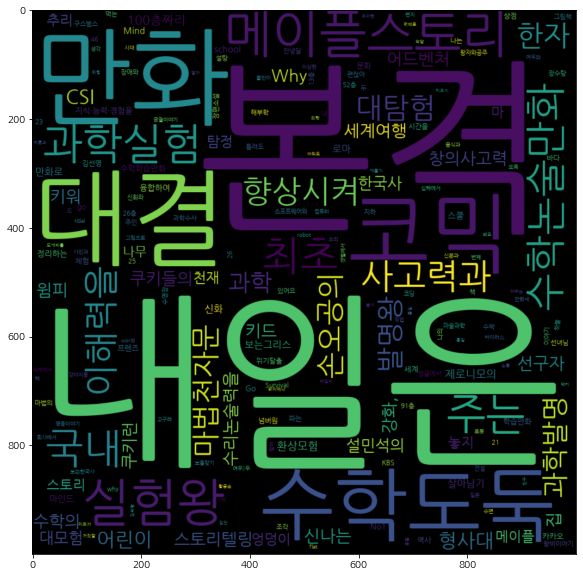

In [67]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.rc('font', family='NanumGothic')
print(plt.rcParams['font.family'])

fig=plt.figure(figsize=(10,10))
plt.imshow(array,interpolation='bilinear')
plt.show()

# 추이 시각화

In [68]:
total_sum=[]
total_sum.append(total_sum00_04)
total_sum.append(total_sum05_09)
total_sum.append(total_sum10_14)
total_sum.append(total_sum15_19)

In [71]:
child_book=[]
child_book.append(child_book00_04)
child_book.append(child_book05_09)
child_book.append(child_book10_14)
child_book.append(child_book15_19)

In [72]:
child_sum=[]
child_sum.append(child_sum00_04)
child_sum.append(child_sum05_09)
child_sum.append(child_sum10_14)
child_sum.append(child_sum15_19)
child_sum

[387498, 1730152, 3517344, 3349819]

In [73]:
start_year=[2000,2005,2010,2015]

Text(0.5, 1.0, '전체 대출 권수')

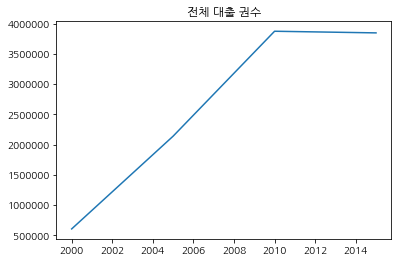

In [74]:
plt.plot(start_year,total_sum)
plt.title('전체 대출 권수')

Text(0.5, 1.0, '아동용 책 비율')

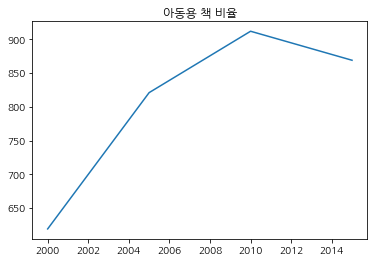

In [75]:
plt.plot(start_year,child_book)
plt.title('아동용 책 비율')

Text(0.5, 1.0, '아동 도서 대출 권수')

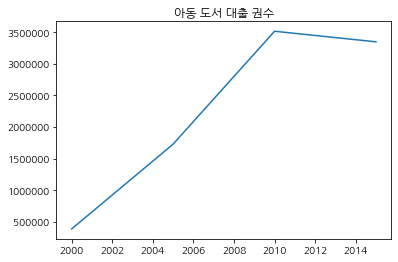

In [76]:
plt.plot(start_year,child_sum)
plt.title('아동 도서 대출 권수')

# 아동 수 확인
- **도서관 이용 고객 중 아동나이: 0세 ~ 13세** 
- 2000년도 이용나이대 출생년도: 2000년 ~ 1987년
- 2001년도 이용나이대 출생년도: 2001년 ~ 1988년
- 2002년도 이용나이대 출생년도: 2002년 ~ 1989년
- 2003년도 이용나이대 출생년도: 2003년 ~ 1990년
- 2004년도 이용나이대 출생년도: 2004년 ~ 1991년
- 2005년도 이용나이대 출생년도: 2005년 ~ 1992년
- 2006년도 이용나이대 출생년도: 2006년 ~ 1993년
- 2007년도 이용나이대 출생년도: 2007년 ~ 1994년
- 2008년도 이용나이대 출생년도: 2008년 ~ 1995년
- 2009년도 이용나이대 출생년도: 2009년 ~ 1996년
- 2010년도 이용나이대 출생년도: 2010년 ~ 1997년
- 2011년도 이용나이대 출생년도: 2011년 ~ 1998년
- 2012년도 이용나이대 출생년도: 2012년 ~ 1999년
- 2013년도 이용나이대 출생년도: 2013년 ~ 2000년
- 2014년도 이용나이대 출생년도: 2014년 ~ 2001년
- 2015년도 이용나이대 출생년도: 2015년 ~ 2002년
- 2016년도 이용나이대 출생년도: 2016년 ~ 2003년
- 2017년도 이용나이대 출생년도: 2017년 ~ 2004년
- 2018년도 이용나이대 출생년도: 2018년 ~ 2005년
- 2019년도 이용나이대 출생년도: 2019년 ~ 2006년

In [77]:
import pandas as pd

In [78]:
df=pd.read_csv('baby_num_from1987.csv')
df

,year,baby_num,total_ratio
0,1987,624.0,1.530
1,1988,633.0,1.550
2,1989,639.0,1.560
3,1990,650.0,1.570
4,1991,709.0,1.710
5,1992,731.0,1.760
6,1993,716.0,1.654
7,1994,721.0,1.656
8,1995,715.0,1.634
9,1996,691.0,1.574


In [79]:
df=df.iloc[:,:].reset_index(drop=True)
df

,year,baby_num,total_ratio
0,1987,624.0,1.530
1,1988,633.0,1.550
2,1989,639.0,1.560
3,1990,650.0,1.570
4,1991,709.0,1.710
5,1992,731.0,1.760
6,1993,716.0,1.654
7,1994,721.0,1.656
8,1995,715.0,1.634
9,1996,691.0,1.574


In [80]:
year=list(df['year'])
print(year)
year.append(2019)
num=list(df['baby_num'])
print(num)
num.append(0)

[1987, 1988, 1989, 1990, 1991, 1992, 1993, 1994, 1995, 1996, 1997, 1998, 1999, 2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018]
[624.0, 633.0, 639.0, 650.0, 709.0, 731.0, 716.0, 721.0, 715.0, 691.0, 675.4, 641.6, 620.7, 640.1, 559.9, 496.9, 495.0, 477.0, 438.7, 451.8, 496.8, 465.9, 444.8, 470.2, 471.3, 484.6, 436.5, 435.4, 438.4, 406.2, 357.8, 326.8]


In [81]:
start_year=[2000,2005,2010,2015]

In [82]:
len(num)

33

In [84]:
# 매 년마다 0세 ~ 13세 아동 수 더하기

baby={}
start_idx=0
for y in range(2000,2020):
    inner=num[start_idx:start_idx+13]
    #print(year[start_idx],end='\t')
    #print(year[start_idx+13])
    start_idx+=1
    baby[int(y)]=sum(inner)

#print(baby)

In [85]:
# 아동수 리스트 생성
year=[]
num=[]
for k,v in baby.items():
    year.append(k)
    num.append(v)
#print(year)
#print(num)

In [86]:
# 5년 단위로 아동수 합하기
number=[]
for i,v in enumerate(year):
    if i%5==0:
        number.append(sum(num[i:i+4]))
number

[34826.8, 31092.899999999994, 26526.1, 23787.299999999996]

In [87]:
# 아동수 증감 비교
print(number[0]-number[1])
print(number[1]-number[2])
print(number[2]-number[3])

3733.9000000000087
4566.799999999996
2738.800000000003


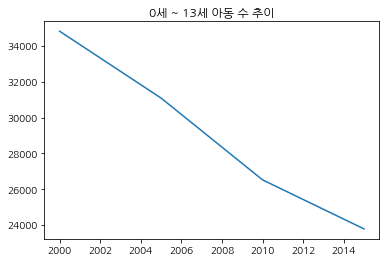

In [88]:
start_year=[2000,2005,2010,2015]
import matplotlib.pyplot as plt
plt.plot(start_year,number)
plt.title('0세 ~ 13세 아동 수 추이')
plt.show()